In [1]:
import keras 
(x_train , y_train) ,(x_test , y_test) =  keras.datasets.cifar10.load_data()

In [2]:
print("input image shape is :" , x_train.shape)
print("output shape is" , y_train.shape)

input image shape is : (50000, 32, 32, 3)
output shape is (50000, 1)


In [3]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot  = to_categorical(y_test) 

In [4]:
print("shape of the output fit for classification is :" ,y_test_onehot.shape)

shape of the output fit for classification is : (10000, 10)


In [14]:
from keras.layers import Conv2D  , Flatten , Dense  , Conv2DTranspose , Conv1DTranspose 
from keras.layers import BatchNormalization  , Concatenate , Dropout , Reshape , Conv1D , MaxPool1D
from keras.layers import MaxPooling2D  , Input  , Maximum
from keras.losses import CategoricalCrossentropy , CategoricalHinge , CategoricalFocalCrossentropy 
from keras.metrics import categorical_accuracy , categorical_focal_crossentropy , categorical_crossentropy 
from keras.regularizers import L1 , L1L2 , L2
from keras.applications import ResNet50V2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [6]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss' , patience=5)

In [7]:
gen = ImageDataGenerator(width_shift_range = 0.1 , rotation_range=10 , channel_shift_range=0.1 , zoom_range=0.1 
                         , rescale=0.1 , vertical_flip=True , horizontal_flip=True )

In [8]:
input_shape= (32,32,3)

In [36]:
input_1 = Input(shape=input_shape , name = 'input_1')

x1 = Conv2D(filters=64, kernel_size=(3 , 3) , activation='relu',padding='same',
    kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(input_1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same',
    kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)


x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Conv2D(filters=64 , kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01, l2 = 0.01))(x1)
x1 = Dropout(0.1)(x1)
x1 = Conv2DTranspose(filters = 32 ,kernel_size=(3 , 3) , activation='relu',padding='same', kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)



x = Flatten()(x1) 
x = Dense(64 , activation='relu' , kernel_regularizer=L1L2(l1 = 0.01 , l2 = 0.01))(x)
x = Dropout(0.1)(x)
output = Dense(10 , activation='softmax' , kernel_regularizer=L1L2(l1=0.01 , l2=0.01))(x)
model = Model(inputs = input_1, outputs = output) # changed this line to use the correct input name
model.compile(optimizer=keras.optimizers.Adam(), loss=CategoricalCrossentropy()
, metrics=[categorical_accuracy ,categorical_focal_crossentropy , categorical_crossentropy ])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 dropout_103 (Dropout)       (None, 32, 32, 64)        0         
                                                                 
 conv2d_transpose_55 (Conv2  (None, 32, 32, 32)        18464     
 DTranspose)                                                     
                                                                 
 batch_normalization_91 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 16, 16, 32)        0  

In [37]:
train_1 = model.fit(x_train , y_train_onehot , batch_size=3000 , epochs=20  ,verbose=1 ,
                     validation_data=(x_test , y_test_onehot) , callbacks=[es] )

Epoch 1/20


2023-09-06 18:38:12.028966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 68.7807 - categorical_accuracy: 0.1455 - categorical_focal_crossentropy: 0.4840 - categorical_crossentropy: 2.3648

2023-09-06 18:38:21.080201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 11s 531ms/step - loss: 68.7807 - categorical_accuracy: 0.1455 - categorical_focal_crossentropy: 0.4840 - categorical_crossentropy: 2.3648 - val_loss: 55.7165 - val_categorical_accuracy: 0.1005 - val_categorical_focal_crossentropy: 0.4655 - val_categorical_crossentropy: 2.3000
Epoch 2/20
17/17 [==============================] - 7s 405ms/step - loss: 45.7836 - categorical_accuracy: 0.2106 - categorical_focal_crossentropy: 0.4143 - categorical_crossentropy: 2.1215 - val_loss: 35.5209 - val_categorical_accuracy: 0.1000 - val_categorical_focal_crossentropy: 0.4668 - val_categorical_crossentropy: 2.3044
Epoch 3/20
17/17 [==============================] - 7s 386ms/step - loss: 27.8810 - categorical_accuracy: 0.2710 - categorical_focal_crossentropy: 0.3687 - categorical_crossentropy: 1.9658 - val_loss: 20.6882 - val_categorical_accuracy: 0.1000 - val_categorical_focal_crossentropy: 0.4673 - val_categorical_crossentropy: 2.3061
Epoch 4/20
17/17 [========

In [38]:
import matplotlib.pyplot as plt

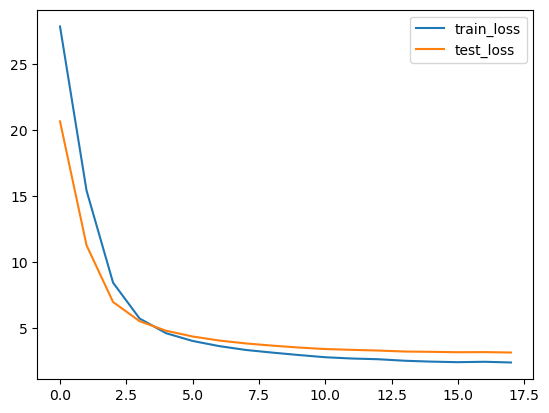

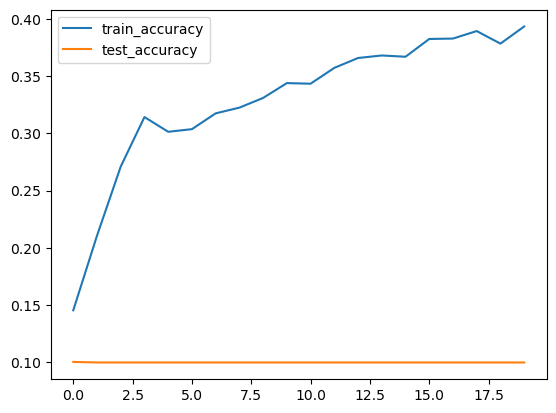

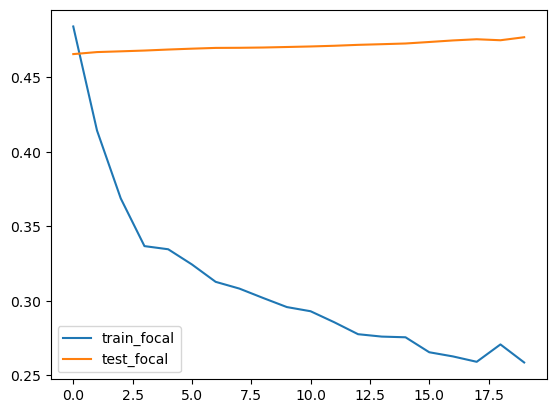

In [39]:
plt.plot(train_1.history['loss'][2:] , label="train_loss")
plt.plot(train_1.history['val_loss'][2:] , label = "test_loss")
plt.legend()
plt.show()

plt.plot(train_1.history['categorical_accuracy'] , label="train_accuracy")
plt.plot(train_1.history['val_categorical_accuracy'] , label = "test_accuracy")
plt.legend()
plt.show()

plt.plot(train_1.history['categorical_focal_crossentropy'] , label="train_focal")
plt.plot(train_1.history['val_categorical_focal_crossentropy'] , label = "test_focal")
plt.legend()
plt.show()